<a href="https://colab.research.google.com/github/Srikan1h/Employee-Attrition-Prediction-Model/blob/main/task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('employee_attrition.csv')

In [6]:
print("Initial Data Snapshot:")
print(df.head())

Initial Data Snapshot:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  Sto

In [7]:
print("\nDataset Information:")
df.info()



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       21 non-null     int64 
 1   Attrition                 21 non-null     object
 2   BusinessTravel            21 non-null     object
 3   DailyRate                 21 non-null     int64 
 4   Department                21 non-null     object
 5   DistanceFromHome          21 non-null     int64 
 6   Education                 21 non-null     int64 
 7   EducationField            21 non-null     object
 8   EmployeeCount             21 non-null     int64 
 9   EmployeeNumber            21 non-null     int64 
 10  EnvironmentSatisfaction   21 non-null     int64 
 11  Gender                    21 non-null     object
 12  HourlyRate                21 non-null     int64 
 13  JobInvolvement            21 non-null     int64 
 14  JobLev

In [8]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [9]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

In [10]:
# Separate features (X) and target (y)
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [11]:

# Identify categorical features to encode
categorical_features = X.select_dtypes(include='object').columns

In [12]:
# Use pandas to perform One-Hot Encoding
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [13]:
# Display the cleaned data
print("Cleaned and Encoded Data Snapshot:")
print(X.head())


Cleaned and Encoded Data Snapshot:
   Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   EducationField_Medical  Educat

In [15]:
# Save the cleaned dataset as a CSV file
X.to_csv('clean_employee_attrition.csv', index=False)


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Set a style for the plots
sns.set_style("whitegrid")

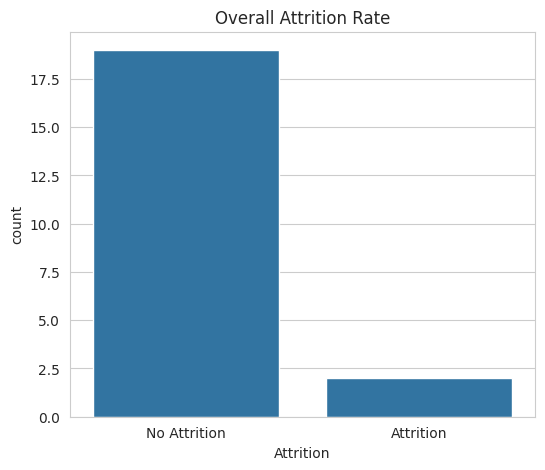

In [18]:
# 1. Visualize the Attrition Rate
plt.figure(figsize=(6, 5))
sns.countplot(x='Attrition', data=df)
plt.title('Overall Attrition Rate')
plt.xticks([0, 1], ['No Attrition', 'Attrition'])
plt.show()

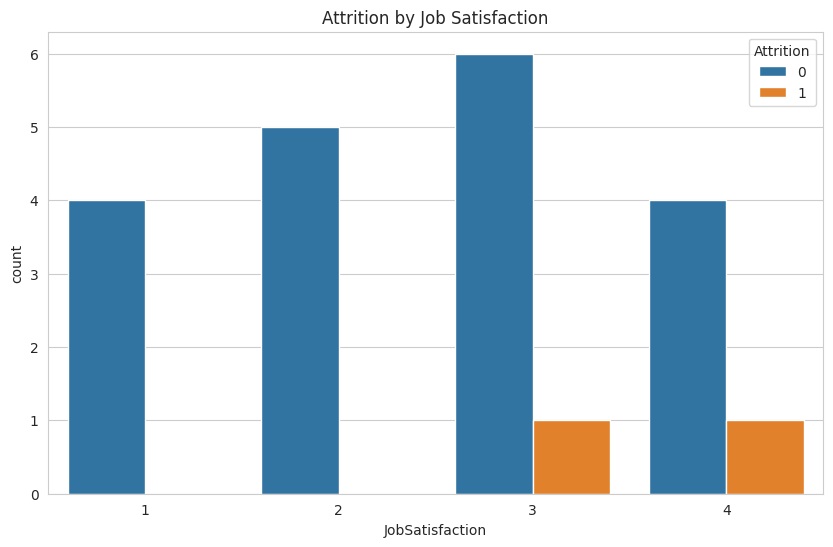

In [21]:
# 2. Attrition by Job Satisfaction (a key insight)
plt.figure(figsize=(10, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by Job Satisfaction')
plt.show()

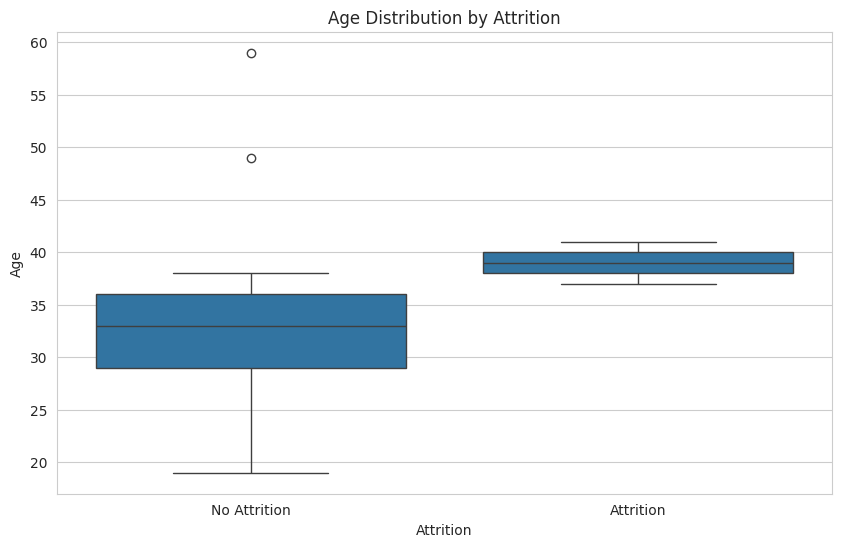

In [22]:
# 3. Attrition by Age (a common analysis)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='Age', data=df)
plt.title('Age Distribution by Attrition')
plt.xticks([0, 1], ['No Attrition', 'Attrition'])
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
# Split data into training and testing sets
# The test_size=0.2 means 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Create a Logistic Regression model instance
model = LogisticRegression(max_iter=1000)

In [27]:
# Train the model using the training data
print("Training the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete!")

Training the Logistic Regression model...
Model training complete!


In [28]:
from sklearn.metrics import classification_report


In [29]:
# Use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

In [30]:
# Print a comprehensive classification report
print("Model Evaluation Report:")
print(classification_report(y_test, y_pred))

Model Evaluation Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
import pickle

# Define the file name for our model
model_filename = 'employee_attrition_model.pkl'

# Save the trained model to the file
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model successfully saved to '{model_filename}'")

Model successfully saved to 'employee_attrition_model.pkl'
